<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/41_DeepFace_Age%2C_Gender%2C_Expression%2C_Headpose_and_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.


## **1. Install the necessary modules and download our files**

In [ ]:
# DeepFace - Yuz tasviri, yosh, jins va tashxis
# Kerakli kutubxonalarni o'rnatish
!pip install deepface opencv-python matplotlib dlib imutils

# Kerakli modelni yuklash va chiqarish
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Test rasmlari uchun
!mkdir -p training_faces
!wget -O me.jpg https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

--2025-05-02 19:50:34--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-05-02 19:50:34--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M  39.0MB/s    in 1.6s    

2025-05-02 19:50:36 (39.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.
--2025-05-02 19:50:36--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolvin

#### **Define our imshow function**

In [ ]:
# Kerakli import kutubxonalari
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from imutils import face_utils
from deepface import DeepFace
import pprint
import pandas as pd
import os

In [ ]:
# Download our test images and a test pic
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
!unzip -q face_recognition.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 34.0MB/s]
--2025-05-02 19:50:52--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2025-05-02 19:50:52--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.gith

## **2. Demonstrate facial landmarks**

In [ ]:
# Rasm ko'rsatish uchun funksiya
def imshow(title="Image", image=None, size=6):
    if image is None:
        print("Rasm topilmadi!")
        return

    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Tekshirish: shape_predictor_68_face_landmarks.dat fayli mavjudmi?
if not os.path.exists("shape_predictor_68_face_landmarks.dat"):
    print("Diqqat: shape_predictor_68_face_landmarks.dat fayli topilmadi!")
    print("Qayta yuklab olish uchun quyidagi buyruqni bajarishga harakat qiling:")
    print("!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2")
    print("!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2")
else:
    print("shape_predictor_68_face_landmarks.dat fayli mavjud.")

shape_predictor_68_face_landmarks.dat fayli mavjud.


## **3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**

**Download our models**

In [ ]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 25.6MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI&confirm=t&uuid=b7a5b1f2-406e-479e-a1fc-78a0185e7903
To: /content/age_model_weights.h5
100% 539M/539M [00:08<00:00, 62.1MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning

In [ ]:
# 1. Yuz landmarklarini aniqlash va ko'rsatish
def detect_landmarks(image_path):
    """Rasmda yuz nuqtalarini aniqlash va ko'rsatish"""
    # Detector va predictor yartamiz
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # Rasmni o'qiymiz
    image = cv2.imread(image_path)
    if image is None:
        print(f"Xatolik: {image_path} fayli o'qib bo'lmadi!")
        return None

    # Kulrang formatga o'tkazamiz
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Yuzlarni aniqlaymiz
    rects = detector(gray, 0)
    print(f"{len(rects)} ta yuz aniqlandi.")

    # Har bir yuz uchun
    for (i, rect) in enumerate(rects):
        # Yuz landmarklarini aniqlaymiz
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Yuz chegarasini chizamiz
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Landmarklarni chizamiz
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

    # Natijani ko'rsatamiz
    imshow("Yuz landmarklari", image)
    return image

In [ ]:
# 2. DeepFace bilan yuz tahlilini ko'rsatish
def analyze_face(image_path, detector_backend='opencv'):
    """Rasmda yuzni tahlil qilish - yosh, jins, etnos va emotsiyalar"""
    try:
        # DeepFace bilan tahlil
        obj = DeepFace.analyze(
            img_path=image_path,
            actions=['age', 'gender', 'race', 'emotion'],
            detector_backend=detector_backend
        )

        # Natijani ko'rsatish
        image = cv2.imread(image_path)

        # Bitta yuz uchun
        if isinstance(obj, dict):
            drawFace(image, obj)
            pp = pprint.PrettyPrinter(indent=4)
            pp.pprint(obj)
        # Ko'p yuzlar uchun
        else:
            for face_obj in obj:
                drawFace(image, face_obj)
                pp = pprint.PrettyPrinter(indent=4)
                pp.pprint(face_obj)

        return obj
    except Exception as e:
        print(f"Xatolik yuz berdi: {e}")
        return None


#### **Create a simple function to display our results on the image**

In [ ]:
# Yuz ma'lumotlarini rasmda chizish
def drawFace(image, obj):
    """Yuz natijalarini rasmda ko'rsatish"""
    if isinstance(image, str):
        image = cv2.imread(image)

    x = obj['region']['x']
    y = obj['region']['y']
    h = obj['region']['h']
    w = obj['region']['w']

    age = obj['age']
    gender = obj['gender']
    gender = 'F' if gender == 'Woman' else 'M'
    dominant_emotion = obj['dominant_emotion']
    dominant_race = obj['dominant_race']

    description = f'{age}{gender} - {dominant_emotion}'

    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, description, (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)
    cv2.putText(image, dominant_race, (x, y+h+30), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

    imshow("Yuz tahlili", image)

#### **Test on another image**

In [ ]:
# 3. DeepFace bilan yuz o'xshashligini tekshirish
def verify_faces(img1_path, img2_path, model_name="VGG-Face", distance_metric="cosine"):
    """Ikki yuzning o'xshashligini tekshirish"""
    try:
        result = DeepFace.verify(
            img1_path=img1_path,
            img2_path=img2_path,
            model_name=model_name,
            distance_metric=distance_metric
        )

        # Natijalarni ko'rsatish
        print(f"Model: {model_name}, Masofa metrikasi: {distance_metric}")
        print(f"O'xshashlik natijasi: {result['verified']}")
        print(f"O'xshashlik qiymati: {result['distance']}, Chegara: {result['threshold']}")

        # Rasmlarni ko'rsatish
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)

        f, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        ax[0].set_title("Birinchi rasm")
        ax[0].axis('off')

        ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        ax[1].set_title("Ikkinchi rasm")
        ax[1].axis('off')

        result_text = "Bir xil odam" if result['verified'] else "Boshqa odam"
        plt.suptitle(f"Natija: {result_text}", fontsize=16)
        plt.tight_layout()
        plt.show()

        return result
    except Exception as e:
        print(f"Xatolik yuz berdi: {e}")
        return None

#### **Change backends of face detection**

In [ ]:
# 4. DeepFace bilan yuz tanish
def recognize_face(img_path, db_path="./training_faces/", model_name="VGG-Face", detector_backend="opencv"):
    """Ma'lumotlar bazasi ichidan yuzni topish"""
    try:
        df = DeepFace.find(
            img_path=img_path,
            db_path=db_path,
            model_name=model_name,
            detector_backend=detector_backend
        )

        if isinstance(df, pd.DataFrame):
            if len(df) > 0:
                print(f"{len(df)} ta o'xshash yuzlar topildi.")

                # Topilgan rasmlarni ko'rsatish
                img = cv2.imread(img_path)
                imshow("Qidirilayotgan yuz", img)

                # Top 3 natijani ko'rsatish
                for i, row in df.head(3).iterrows():
                    matched_img = cv2.imread(row['identity'])
                    imshow(f"O'xshashlik: {row['distance']:.4f}", matched_img)

                return df
            else:
                print("O'xshash yuzlar topilmadi.")
                return df
        else:
            print("Hech qanday natija topilmadi.")
            return None
    except Exception as e:
        print(f"Xatolik yuz berdi: {e}")
        return None

## **4. Perform Facial Similarity**

In [ ]:
# 5. Turli modellar bilan yuz tanish
def compare_face_recognition_models(img_path, db_path="./training_faces/", detector_backend="opencv"):
    """Turli modellar bilan yuz tanishni solishtirish"""
    models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
    dfs = []

    for model in models:
        try:
            print(f"\nModel: {model} bilan qidirilmoqda...")
            df = DeepFace.find(
                img_path=img_path,
                db_path=db_path,
                model_name=model,
                detector_backend=detector_backend
            )

            if isinstance(df, pd.DataFrame) and len(df) > 0:
                df['model'] = model
                dfs.append(df)
                print(f"{model}: {len(df)} ta o'xshash yuzlar topildi.")
            else:
                print(f"{model}: O'xshash yuzlar topilmadi.")
        except Exception as e:
            print(f"{model} modelida xatolik: {e}")

    if dfs:
        result_df = pd.concat(dfs)
        print("\nBarcha modellar natijalari:")
        print(result_df)
        return result_df
    else:
        print("Hech qanday natija topilmadi.")
        return None

### **We can even use different Distance Metrics**

In [ ]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg", distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

25-05-02 19:53:31 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:05<00:00, 105MB/s]


InvalidArgumentError: Exception encountered when calling layer 'conv2d_16' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D] name: 

Call arguments received by layer 'conv2d_16' (type Conv2D):
  • inputs=tf.Tensor(shape=(1, 226, 226, 3), dtype=float32)

In [ ]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_3.jpg", distance_metric = 'euclidean_l2')
print("Is verified: ", result["verified"])
result

### **Download models as the existing DeepFace downloader has stopped working**

In [ ]:
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
!mv vgg_face_weights.h5 /root/.deepface/weights/vgg_face_weights.h5
!mv facenet_weights.h5 /root/.deepface/weights/facenet_weights.h5

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
From (redirected): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1&confirm=t&uuid=eaefe05b-d09d-49ed-9f45-939b61f8863e
To: /content/vgg_face_weights.h5
100% 580M/580M [00:09<00:00, 58.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:01<00:00, 64.4MB/s]


## **5. Perform Facial Recognition**

In [ ]:
# Test rasmi yuklash funksiyasi
def upload_sample_images():
    """Demo uchun namunali rasmlarni yuklash"""
    # Test uchun rasmlarni yuklab olish
    if not os.path.exists("training_faces/sample1.jpg"):
        print("Namunali rasmlarni yuklab olish...")

        # Namunali rasmlar - bu yerda sizdagi rasmlarni almashtiring
        urls = [
            ("https://www.openface-api.com/images/examples/example1.jpg", "training_faces/sample1.jpg"),
            ("https://www.openface-api.com/images/examples/example2.jpg", "training_faces/sample2.jpg")
        ]

        for url, path in urls:
            try:
                !wget -O {path} {url}
                print(f"Yuklandi: {path}")
            except Exception as e:
                print(f"Xatolik: {e}")

    # Mavjud rasmlarni tekshirish
    files = os.listdir("training_faces")
    print(f"Mavjud rasmlar: {files}")

    return files

## **We can even try a few different models**

DeepFace bilan yuz tasviri, yosh, jins va tashxis

1. Yuz landmarklarini aniqlash
1 ta yuz aniqlandi.


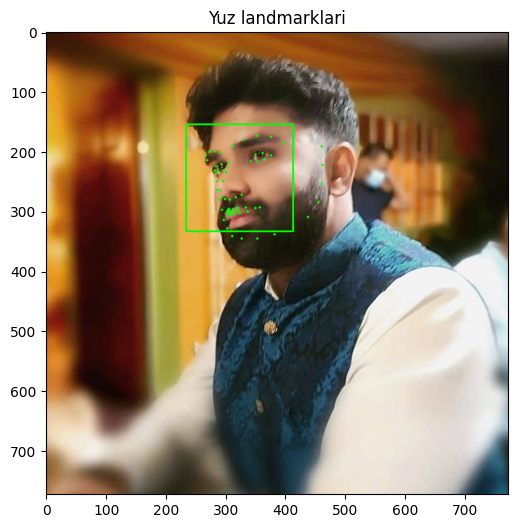


2. Yuz tahlilini ko'rsatish


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]

Xatolik yuz berdi: Exception encountered when calling layer 'conv2d' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D] name: 

Call arguments received by layer 'conv2d' (type Conv2D):
  • inputs=tf.Tensor(shape=(1, 226, 226, 3), dtype=float32)


In [ ]:
"""Asosiy kod - barcha funksiyalarni ishga tushirish"""
print("DeepFace bilan yuz tasviri, yosh, jins va tashxis")

# 1. Yuz landmarklarini aniqlash
print("\n1. Yuz landmarklarini aniqlash")
detect_landmarks("me.jpg")

# 2. Yuz tahlilini ko'rsatish
print("\n2. Yuz tahlilini ko'rsatish")
analyze_face("me.jpg", detector_backend='opencv')

In [ ]:
# 3. Rasmdagi yuzlarni solishtirish
if os.path.exists("training_faces") and os.listdir("training_faces"):
    files = os.listdir("training_faces")
    if len(files) >= 2:
        print("\n3. Rasmdagi yuzlarni solishtirish")
        img1 = os.path.join("training_faces", files[0])
        img2 = os.path.join("training_faces", files[1])
        verify_faces(img1, img2)
    else:
        print("Solishtirish uchun yetarli rasmlar yo'q.")

# 4. Yuz tanish (qo'shimcha rasmlar bo'lsa)
if os.path.exists("training_faces") and len(os.listdir("training_faces")) > 1:
    print("\n4. Yuz tanish")
    recognize_face("me.jpg", db_path="./training_faces/")

print("\nBarcha ishlar yakunlandi.")


3. Rasmdagi yuzlarni solishtirish
Xatolik yuz berdi: Exception encountered when calling layer 'conv2d_16' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D] name: 

Call arguments received by layer 'conv2d_16' (type Conv2D):
  • inputs=tf.Tensor(shape=(1, 226, 226, 3), dtype=float32)

4. Yuz tanish
25-05-02 19:55:36 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:  11%|█         | 1/9 [00:00<00:02,  3.19it/s]

25-05-02 19:55:36 - 🔴 Exception while extracting faces from ./training_faces/Nidia_2.jpg: Face could not be detected in ./training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  11%|█         | 1/9 [00:00<00:07,  1.10it/s]

Xatolik yuz berdi: Exception encountered when calling layer 'conv2d_16' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} No DNN in stream executor. [Op:Conv2D] name: 

Call arguments received by layer 'conv2d_16' (type Conv2D):
  • inputs=tf.Tensor(shape=(1, 226, 226, 3), dtype=float32)

Barcha ishlar yakunlandi.


Here's a great tutorial on building a MongoDB based system for facial recognition https://sefiks.com/2021/01/22/deep-face-recognition-with-mongodb/